###**Loading The Dataset**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
cric_data = pd.read_csv("/content/combined_cricket_data.csv")

###**Basic Overview of the Dataset**

In [2]:
print(cric_data.head())


                  match teamInnings  battingPos             batsmanName  runs  \
0  Namibia Vs Sri Lanka     Namibia         1.0      Michael van Lingen     3   
1  Namibia Vs Sri Lanka     Namibia         2.0           Divan la Cock     9   
2  Namibia Vs Sri Lanka   Sri Lanka         1.0         Pathum Nissanka     9   
3  Namibia Vs Sri Lanka     Namibia         3.0  Jan Nicol Loftie-Eaton    20   
4  Namibia Vs Sri Lanka     Namibia         4.0           Stephan Baard    26   

   balls  4s  6s Strike Rate out/not_out  ...      team2   winner   margin  \
0    6.0   0   0          50         out  ...  Sri Lanka  Namibia  55 runs   
1    9.0   1   0         100         out  ...  Sri Lanka  Namibia  55 runs   
2   10.0   1   0          90         out  ...  Sri Lanka  Namibia  55 runs   
3   12.0   1   2      166.66         out  ...  Sri Lanka  Namibia  55 runs   
4   24.0   2   0      108.33         out  ...  Sri Lanka  Namibia  55 runs   

    ground  matchDate       team    battingS

In [3]:
print(cric_data.describe())

       battingPos         runs       balls           4s           6s  \
count  699.000000  1175.000000  699.000000  1175.000000  1175.000000   
mean     4.979971    19.063830   13.648069     1.518298     0.560851   
std      2.813628    16.201621   12.718093     1.724993     0.946346   
min      1.000000     0.000000    0.000000     0.000000     0.000000   
25%      3.000000     6.000000    4.000000     0.000000     0.000000   
50%      5.000000    16.000000   10.000000     1.000000     0.000000   
75%      7.000000    27.000000   19.000000     2.000000     1.000000   
max     11.000000   109.000000   64.000000    10.000000     8.000000   

           overs      maiden     wickets     economy          0s       wides  \
count  502.00000  502.000000  502.000000  502.000000  502.000000  502.000000   
mean     3.15000    0.033865    1.033865    7.581295    7.645418    0.615538   
std      1.04101    0.191768    1.030885    2.903511    4.237200    0.889951   
min      0.50000    0.000000   

In [4]:
print(cric_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1175 entries, 0 to 1174
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   match         1175 non-null   object 
 1   teamInnings   699 non-null    object 
 2   battingPos    699 non-null    float64
 3   batsmanName   699 non-null    object 
 4   runs          1175 non-null   int64  
 5   balls         699 non-null    float64
 6   4s            1175 non-null   int64  
 7   6s            1175 non-null   int64  
 8   Strike Rate   699 non-null    object 
 9   out/not_out   699 non-null    object 
 10  match_id      1175 non-null   object 
 11  bowlerName    502 non-null    object 
 12  overs         502 non-null    float64
 13  maiden        502 non-null    float64
 14  wickets       502 non-null    float64
 15  economy       502 non-null    float64
 16  0s            502 non-null    float64
 17  wides         502 non-null    float64
 18  noBalls       502 non-null  

In [5]:
cric_data.shape

(1175, 30)

In [6]:
cric_data.columns

Index(['match', 'teamInnings', 'battingPos', 'batsmanName', 'runs', 'balls',
       '4s', '6s', 'Strike Rate', 'out/not_out', 'match_id', 'bowlerName',
       'overs', 'maiden', 'wickets', 'economy', '0s', 'wides', 'noBalls',
       'team1', 'team2', 'winner', 'margin', 'ground', 'matchDate', 'team',
       'battingStyle', 'bowlingStyle', 'playingRole', 'description'],
      dtype='object')

###**Data Cleaning**

In [7]:


# Check column data types
print("Column Data Types:\n", cric_data.dtypes)

# Check for missing values before imputation
print("\nNumber of missing values before imputation:\n", cric_data.isnull().sum())

# Convert necessary columns to numeric, coercing errors
numeric_cols = ['runs', 'balls', '4s', '6s', 'Strike Rate', 'overs', 'maiden', 'wickets', 'economy', '0s', 'wides', 'noBalls']
for col in numeric_cols:
    if col in cric_data.columns:
        cric_data[col] = pd.to_numeric(cric_data[col], errors='coerce')

# Ensure 'battingPos' is numeric and handle missing values
if 'battingPos' in cric_data.columns:
    cric_data['battingPos'] = pd.to_numeric(cric_data['battingPos'], errors='coerce')
    if cric_data['battingPos'].isnull().all():
        print("'battingPos' column is entirely null.")
    else:
        cric_data['battingPos'] = cric_data['battingPos'].fillna(cric_data['battingPos'].median())

# Data Cleaning: Handling missing values with median imputation for all numeric columns
cric_data[numeric_cols] = cric_data[numeric_cols].fillna(cric_data[numeric_cols].median())
cric_data.fillna({
    col: cric_data[col].mode()[0] for col in cric_data.select_dtypes(include=['object']).columns
}, inplace=True)

# Verify imputed values and check for remaining nulls
print("\nNumber of missing values after imputation:\n", cric_data.isnull().sum())

# Remove duplicate rows
print("Duplicate rows before removal:", cric_data.duplicated().sum())
cric_data = cric_data.drop_duplicates()
print("Duplicate rows after removal:", cric_data.duplicated().sum())

# Handle zero or invalid values for specified columns by replacing with median
for col in ['runs', 'overs', 'wickets', 'economy']:
    if col in cric_data.columns:
        median_value = cric_data.loc[cric_data[col] > 0, col].median()
        cric_data[col] = cric_data[col].replace(0, median_value)
        print(f"Zero values in '{col}' replaced with median.")

# Convert 'matchDate' to datetime if present
if 'matchDate' in cric_data.columns:
    cric_data['matchDate'] = pd.to_datetime(cric_data['matchDate'], format='%d-%m-%Y', errors='coerce')

# Diagnostic checks for nulls and zero-variance columns
print("\nChecking for columns with all NaN values:")
print(cric_data[numeric_cols].isnull().sum())

zero_variance = [col for col in numeric_cols if cric_data[col].nunique() <= 1]
print("Zero variance columns:", zero_variance)

if zero_variance:
    cric_data = cric_data.drop(columns=zero_variance)

# Check dataset shape before dropping nulls
print("Dataset shape before dropping nulls:", cric_data.shape)

# Drop rows with remaining nulls in numeric columns if any
cric_data = cric_data.dropna(subset=numeric_cols, how='any')
print("Dataset shape after dropping nulls:", cric_data.shape)





Column Data Types:
 match            object
teamInnings      object
battingPos      float64
batsmanName      object
runs              int64
balls           float64
4s                int64
6s                int64
Strike Rate      object
out/not_out      object
match_id         object
bowlerName       object
overs           float64
maiden          float64
wickets         float64
economy         float64
0s              float64
wides           float64
noBalls         float64
team1            object
team2            object
winner           object
margin           object
ground           object
matchDate        object
team             object
battingStyle     object
bowlingStyle     object
playingRole      object
description      object
dtype: object

Number of missing values before imputation:
 match             0
teamInnings     476
battingPos      476
batsmanName     476
runs              0
balls           476
4s                0
6s                0
Strike Rate     476
out/not_out     476


In [8]:
cric_data.head()

,match,teamInnings,battingPos,batsmanName,runs,balls,4s,6s,Strike Rate,out/not_out,...,team2,winner,margin,ground,matchDate,team,battingStyle,bowlingStyle,playingRole,description
0,Namibia Vs Sri Lanka,Namibia,1.0,Michael van Lingen,3,6.0,0,0,50.00,out,...,Sri Lanka,Namibia,55 runs,Geelong,NaT,Namibia,Left hand Bat,Left arm Medium,Bowling Allrounder,"A doughty wicketkeeper-batsman, Regis Chakabva..."
1,Namibia Vs Sri Lanka,Namibia,2.0,Divan la Cock,9,9.0,1,0,100.00,out,...,Sri Lanka,Namibia,55 runs,Geelong,NaT,Namibia,Right hand Bat,Legbreak,Opening Batter,"A doughty wicketkeeper-batsman, Regis Chakabva..."
2,Namibia Vs Sri Lanka,Sri Lanka,1.0,Pathum Nissanka,9,10.0,1,0,90.00,out,...,Sri Lanka,Namibia,55 runs,Geelong,NaT,Sri Lanka,Right hand Bat,Right arm Offbreak,Top order Batter,"A doughty wicketkeeper-batsman, Regis Chakabva..."
3,Namibia Vs Sri Lanka,Namibia,3.0,Jan Nicol Loftie-Eaton,20,12.0,1,2,166.66,out,...,Sri Lanka,Namibia,55 runs,Geelong,NaT,Namibia,Left hand Bat,"Right arm Medium, Legbreak",Batter,"A doughty wicketkeeper-batsman, Regis Chakabva..."
4,Namibia Vs Sri Lanka,Namibia,4.0,Stephan Baard,26,24.0,2,0,108.33,out,...,Sri Lanka,Namibia,55 runs,Geelong,NaT,Namibia,Right hand Bat,Right arm Medium fast,Batter,"A doughty wicketkeeper-batsman, Regis Chakabva..."



Correlation Matrix:
              battingPos      runs     balls        4s        6s  Strike Rate  \
battingPos     1.000000 -0.290685 -0.418442 -0.295372 -0.174724    -0.064646   
runs          -0.290685  1.000000  0.734059  0.786139  0.682742     0.352152   
balls         -0.418442  0.734059  1.000000  0.603384  0.437617     0.338803   
4s            -0.295372  0.786139  0.603384  1.000000  0.360787     0.419367   
6s            -0.174724  0.682742  0.437617  0.360787  1.000000     0.385940   
Strike Rate   -0.064646  0.352152  0.338803  0.419367  0.385940     1.000000   
overs         -0.037160  0.139458  0.096857  0.070804  0.037950    -0.003233   
maiden        -0.024222 -0.010292 -0.022237  0.012459 -0.010928    -0.003603   
wickets        0.018698  0.052376 -0.063913  0.061335  0.019336     0.006678   
economy       -0.007515  0.237287 -0.010199  0.275021  0.312646     0.012832   
0s            -0.020826  0.031752  0.022868  0.028176 -0.015632     0.000400   
wides          0.0

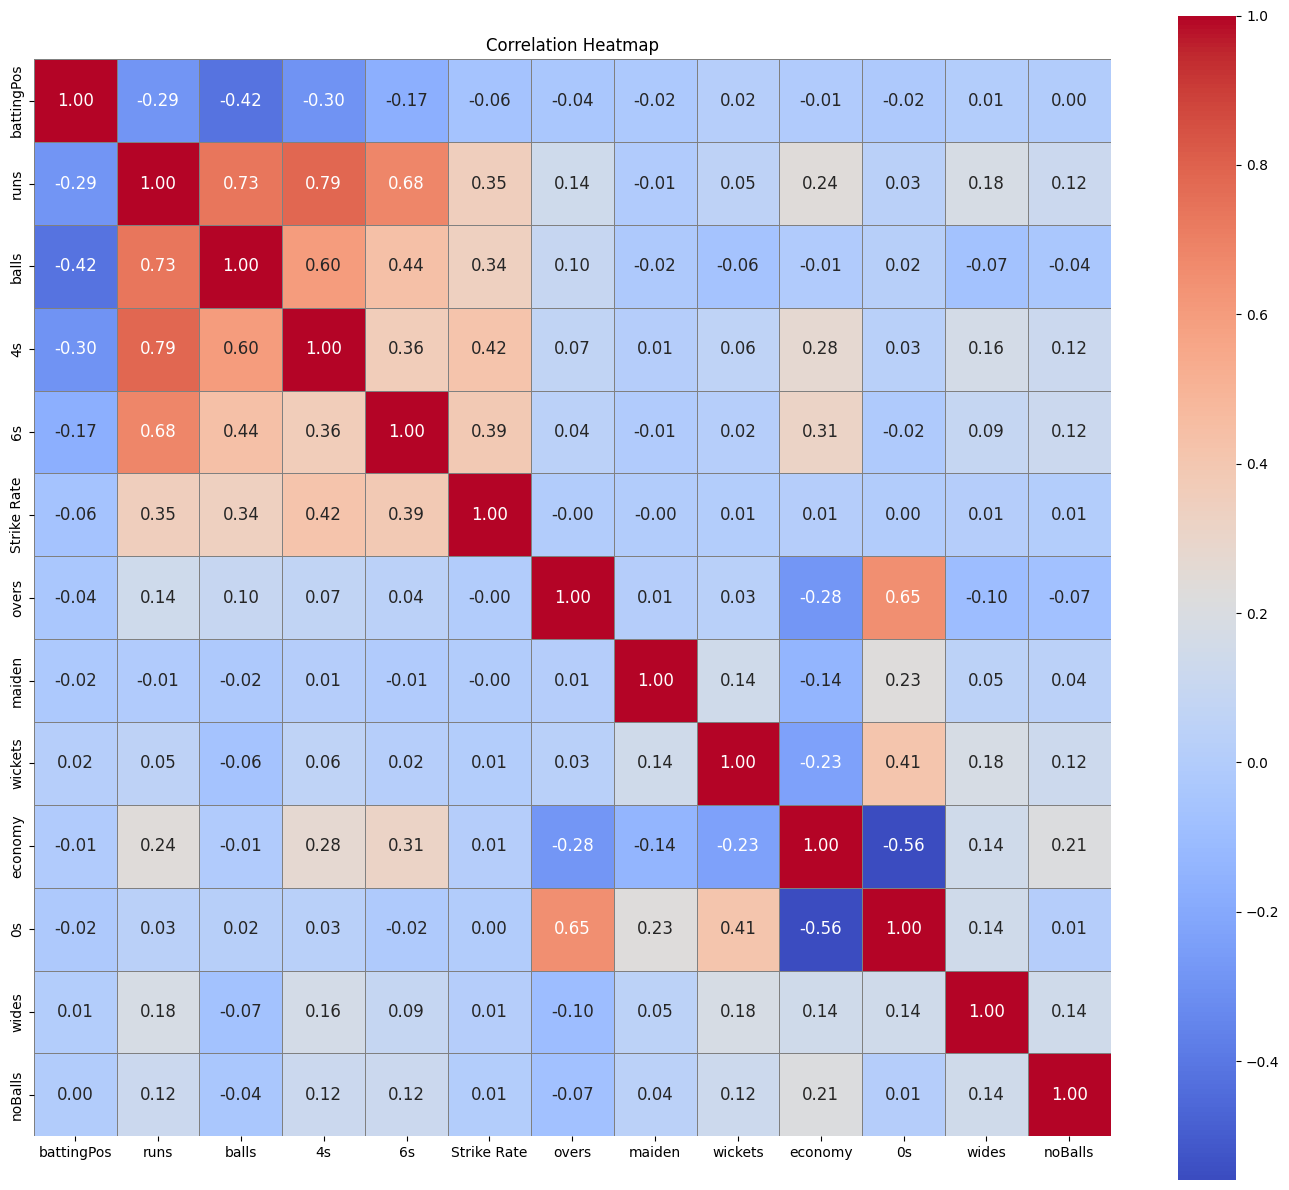

In [9]:
# Check correlation matrix manually
if not cric_data.empty:
    correlation = cric_data.corr(numeric_only=True)
    print("\nCorrelation Matrix:\n", correlation)
    plt.figure(figsize=(14, 12))
    sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={"size": 12}, square=True, linewidths=0.5, linecolor='gray')
    plt.title('Correlation Heatmap')
    plt.tight_layout()
    plt.show()
else:
    print("No data available for correlation heatmap.")

**Generating histograms for checking data distribution and a pairplot to analyze relationships between numeric features. These visualizations will help confirm if the data is clean and ready for EDA and modeling.**

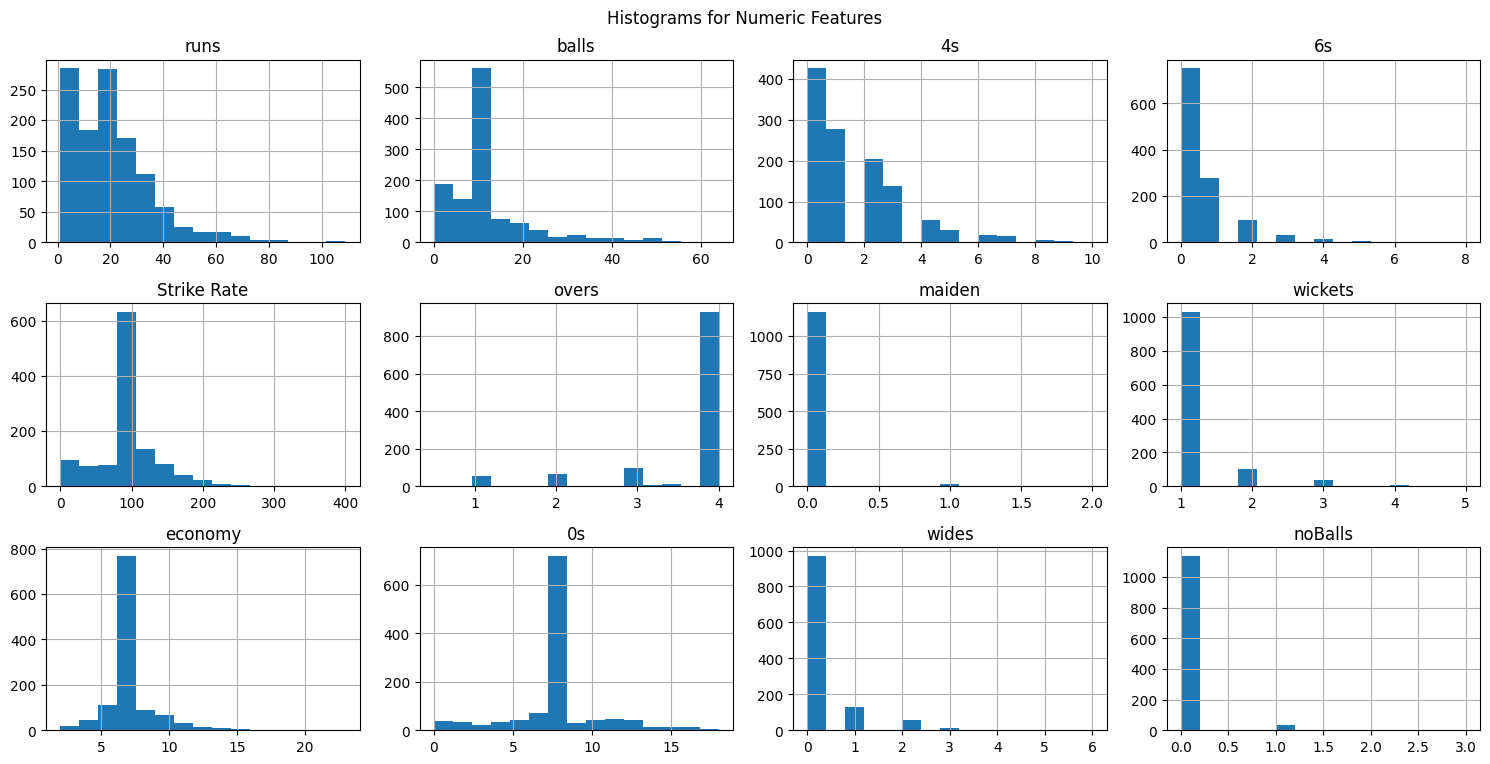

In [10]:
# Histograms for distribution check
cric_data[numeric_cols].hist(bins=15, figsize=(15, 10), layout=(4, 4))
plt.suptitle('Histograms for Numeric Features')
plt.tight_layout()
plt.show()



In [11]:
cric_data.head()

,match,teamInnings,battingPos,batsmanName,runs,balls,4s,6s,Strike Rate,out/not_out,...,team2,winner,margin,ground,matchDate,team,battingStyle,bowlingStyle,playingRole,description
0,Namibia Vs Sri Lanka,Namibia,1.0,Michael van Lingen,3,6.0,0,0,50.00,out,...,Sri Lanka,Namibia,55 runs,Geelong,NaT,Namibia,Left hand Bat,Left arm Medium,Bowling Allrounder,"A doughty wicketkeeper-batsman, Regis Chakabva..."
1,Namibia Vs Sri Lanka,Namibia,2.0,Divan la Cock,9,9.0,1,0,100.00,out,...,Sri Lanka,Namibia,55 runs,Geelong,NaT,Namibia,Right hand Bat,Legbreak,Opening Batter,"A doughty wicketkeeper-batsman, Regis Chakabva..."
2,Namibia Vs Sri Lanka,Sri Lanka,1.0,Pathum Nissanka,9,10.0,1,0,90.00,out,...,Sri Lanka,Namibia,55 runs,Geelong,NaT,Sri Lanka,Right hand Bat,Right arm Offbreak,Top order Batter,"A doughty wicketkeeper-batsman, Regis Chakabva..."
3,Namibia Vs Sri Lanka,Namibia,3.0,Jan Nicol Loftie-Eaton,20,12.0,1,2,166.66,out,...,Sri Lanka,Namibia,55 runs,Geelong,NaT,Namibia,Left hand Bat,"Right arm Medium, Legbreak",Batter,"A doughty wicketkeeper-batsman, Regis Chakabva..."
4,Namibia Vs Sri Lanka,Namibia,4.0,Stephan Baard,26,24.0,2,0,108.33,out,...,Sri Lanka,Namibia,55 runs,Geelong,NaT,Namibia,Right hand Bat,Right arm Medium fast,Batter,"A doughty wicketkeeper-batsman, Regis Chakabva..."


In [12]:
# 'categorical_cols' is a list of your categorical column names
categorical_cols = ['teamInnings', 'batsmanName', 'out/not_out', 'bowlerName', 'team1', 'team2', 'winner', 'ground', 'team', 'battingStyle', 'bowlingStyle', 'playingRole', 'description']
# Check for missing values in categorical columns
missing_categorical = cric_data[categorical_cols].isnull().sum()

# Print the results
print("Missing values in categorical columns:\n", missing_categorical)

Missing values in categorical columns:
 teamInnings     0
batsmanName     0
out/not_out     0
bowlerName      0
team1           0
team2           0
winner          0
ground          0
team            0
battingStyle    0
bowlingStyle    0
playingRole     0
description     0
dtype: int64


In [13]:
cric_data.head()

,match,teamInnings,battingPos,batsmanName,runs,balls,4s,6s,Strike Rate,out/not_out,...,team2,winner,margin,ground,matchDate,team,battingStyle,bowlingStyle,playingRole,description
0,Namibia Vs Sri Lanka,Namibia,1.0,Michael van Lingen,3,6.0,0,0,50.00,out,...,Sri Lanka,Namibia,55 runs,Geelong,NaT,Namibia,Left hand Bat,Left arm Medium,Bowling Allrounder,"A doughty wicketkeeper-batsman, Regis Chakabva..."
1,Namibia Vs Sri Lanka,Namibia,2.0,Divan la Cock,9,9.0,1,0,100.00,out,...,Sri Lanka,Namibia,55 runs,Geelong,NaT,Namibia,Right hand Bat,Legbreak,Opening Batter,"A doughty wicketkeeper-batsman, Regis Chakabva..."
2,Namibia Vs Sri Lanka,Sri Lanka,1.0,Pathum Nissanka,9,10.0,1,0,90.00,out,...,Sri Lanka,Namibia,55 runs,Geelong,NaT,Sri Lanka,Right hand Bat,Right arm Offbreak,Top order Batter,"A doughty wicketkeeper-batsman, Regis Chakabva..."
3,Namibia Vs Sri Lanka,Namibia,3.0,Jan Nicol Loftie-Eaton,20,12.0,1,2,166.66,out,...,Sri Lanka,Namibia,55 runs,Geelong,NaT,Namibia,Left hand Bat,"Right arm Medium, Legbreak",Batter,"A doughty wicketkeeper-batsman, Regis Chakabva..."
4,Namibia Vs Sri Lanka,Namibia,4.0,Stephan Baard,26,24.0,2,0,108.33,out,...,Sri Lanka,Namibia,55 runs,Geelong,NaT,Namibia,Right hand Bat,Right arm Medium fast,Batter,"A doughty wicketkeeper-batsman, Regis Chakabva..."


###**Few Visualizations**

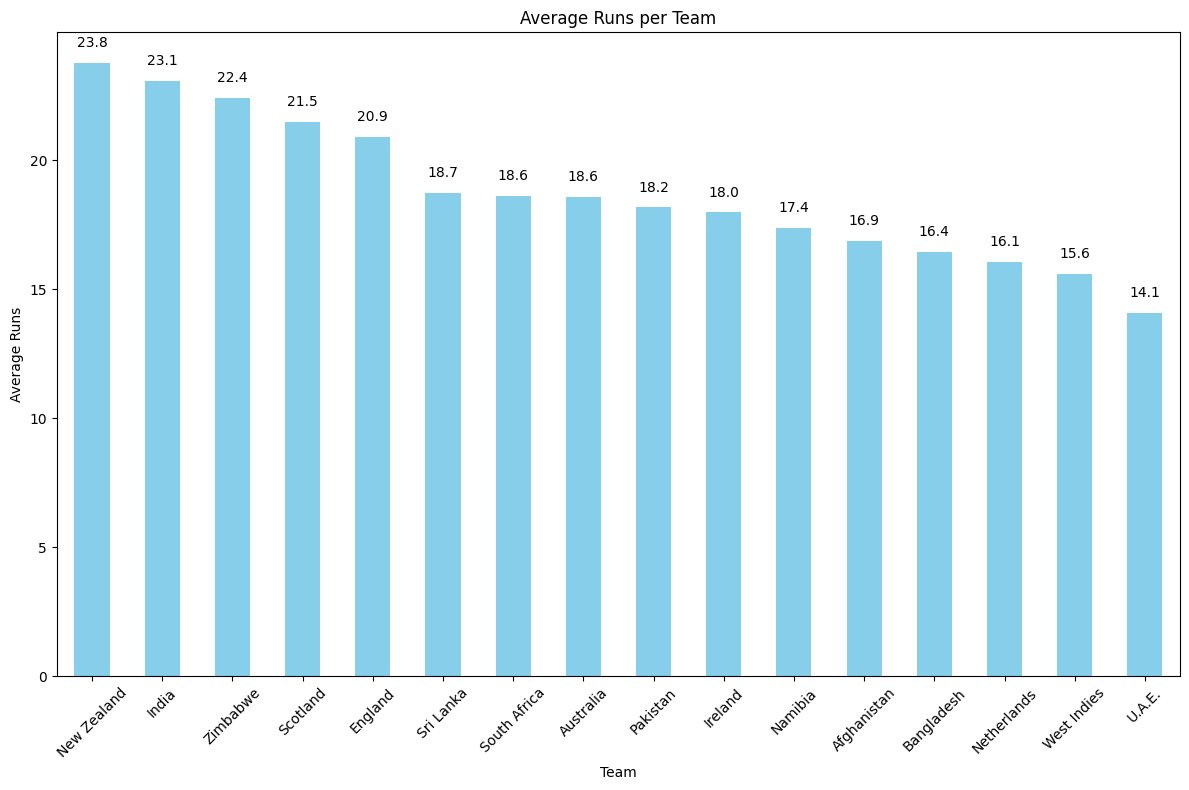

In [14]:
# Bar plot for average runs per team with team names displayed
avg_runs = cric_data.groupby('team')['runs'].mean().sort_values(ascending=False)
ax = avg_runs.plot(kind='bar', figsize=(12, 8), color='skyblue')
plt.title('Average Runs per Team')
plt.xlabel('Team')
plt.ylabel('Average Runs')
plt.xticks(rotation=45)
for i, v in enumerate(avg_runs):
    ax.text(i, v + 0.5, f"{v:.1f}", ha='center', va='bottom')
plt.tight_layout()
plt.show()

<ipython-input-15-b055d7b8d7fd>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=cric_data, x='winner', order=cric_data['winner'].value_counts().index, palette='pastel')


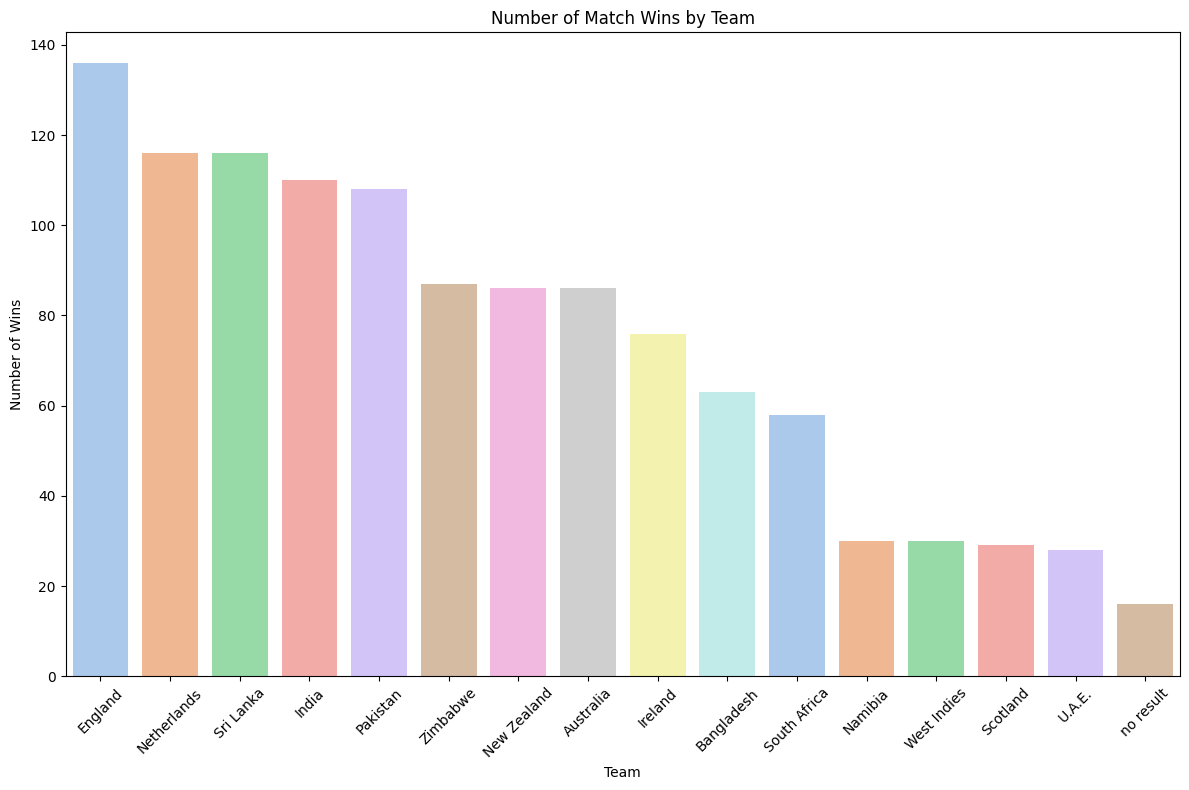

In [15]:
# Count plot for match wins by team
plt.figure(figsize=(12, 8))
sns.countplot(data=cric_data, x='winner', order=cric_data['winner'].value_counts().index, palette='pastel')
plt.title('Number of Match Wins by Team')
plt.xlabel('Team')
plt.ylabel('Number of Wins')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

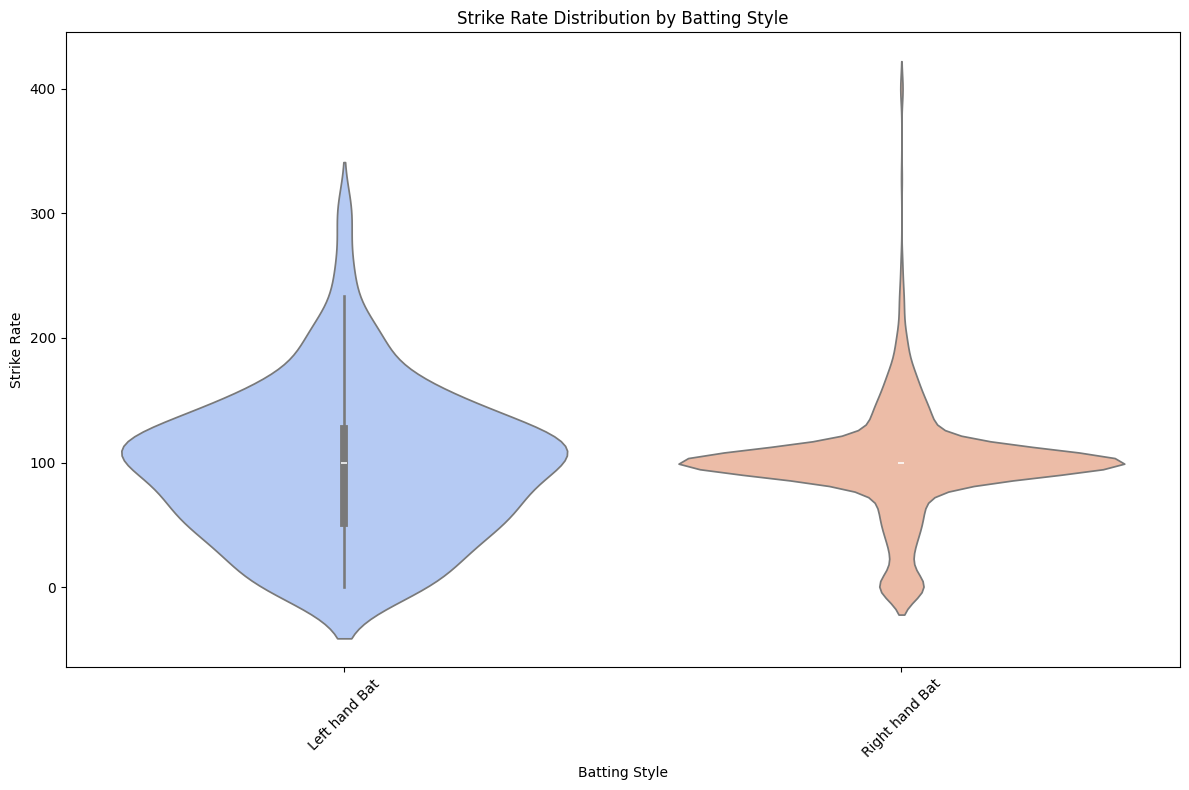

In [16]:
# Violin plot for strike rate by batting style
plt.figure(figsize=(12, 8))
sns.violinplot(data=cric_data, x='battingStyle', y='Strike Rate', hue='battingStyle', palette='coolwarm', legend=False)
plt.title('Strike Rate Distribution by Batting Style')
plt.xlabel('Batting Style')
plt.ylabel('Strike Rate')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

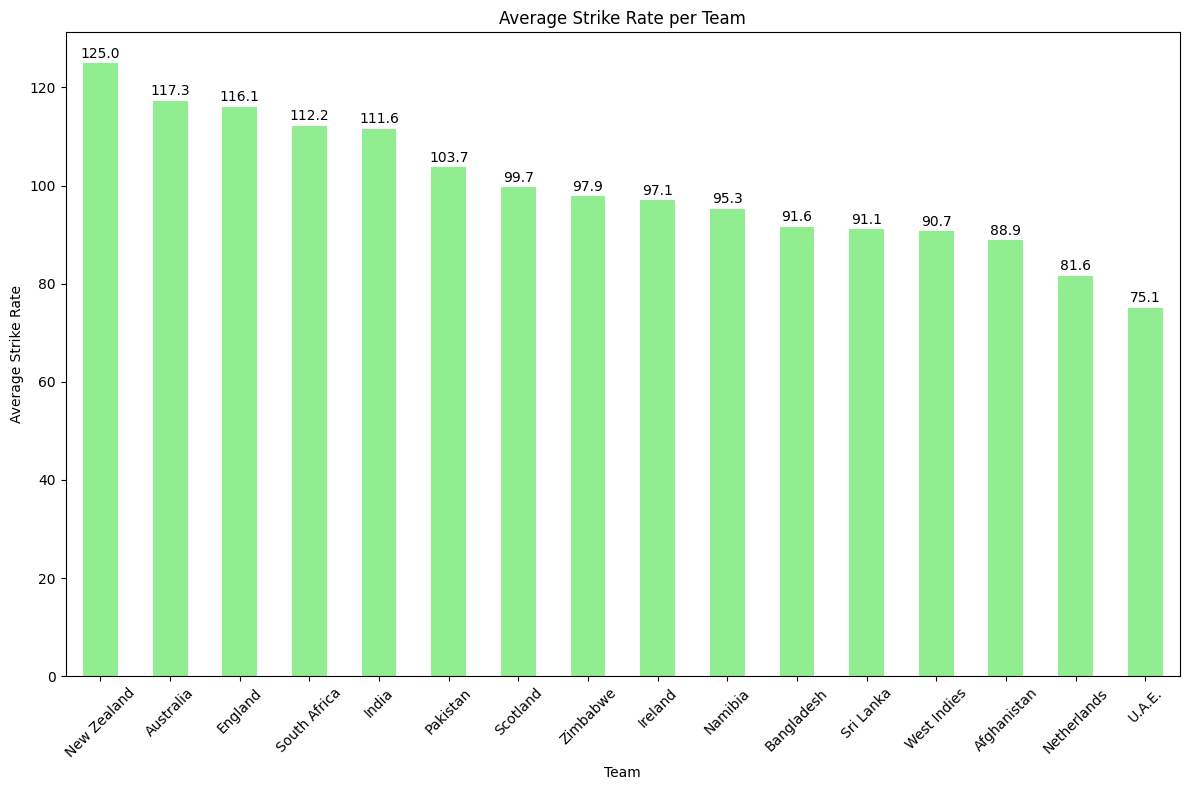

In [17]:
# Bar plot for average strike rate per team
avg_strike_rate = cric_data.groupby('team')['Strike Rate'].mean().sort_values(ascending=False)
ax = avg_strike_rate.plot(kind='bar', figsize=(12, 8), color='lightgreen')
plt.title('Average Strike Rate per Team')
plt.xlabel('Team')
plt.ylabel('Average Strike Rate')
plt.xticks(rotation=45)
for i, v in enumerate(avg_strike_rate):
    ax.text(i, v + 0.5, f"{v:.1f}", ha='center', va='bottom')
plt.tight_layout()
plt.show()

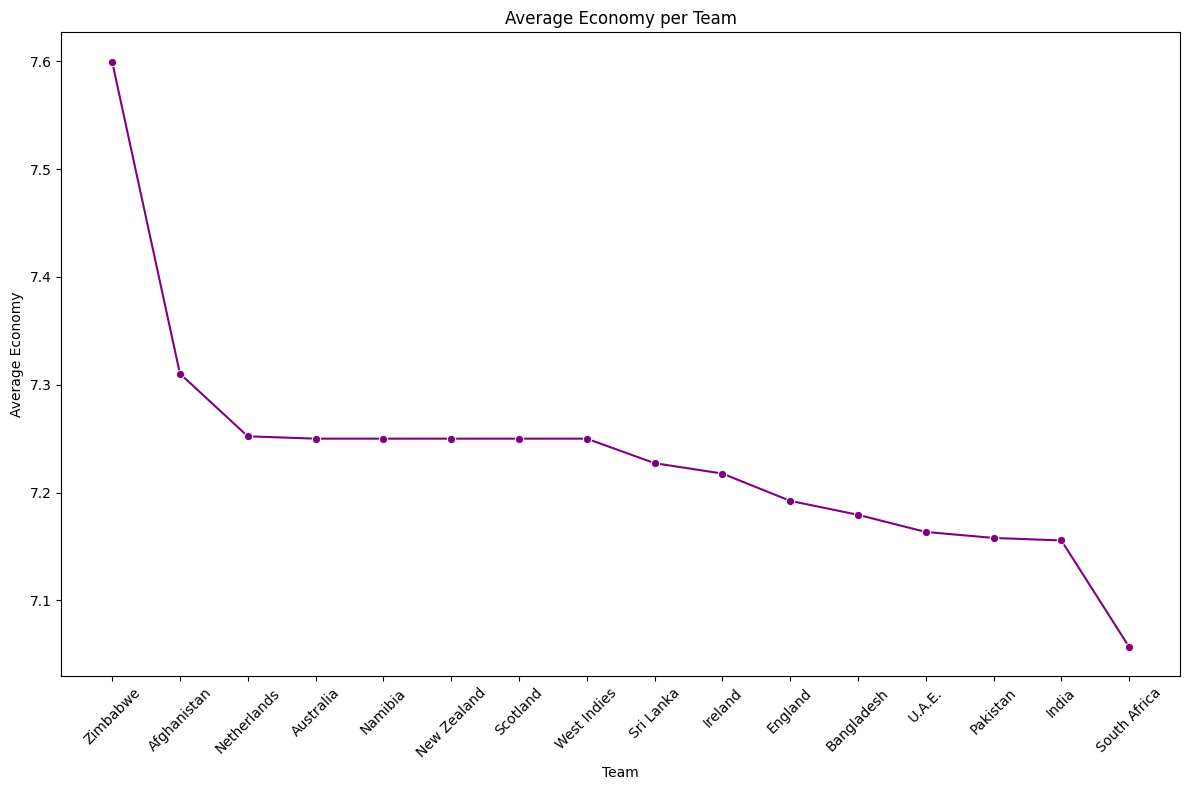

In [18]:
# Line plot for average economy per team for better trend visualization
avg_economy = cric_data.groupby('team')['economy'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 8))
sns.lineplot(x=avg_economy.index, y=avg_economy.values, marker='o', color='purple')
plt.title('Average Economy per Team')
plt.xlabel('Team')
plt.ylabel('Average Economy')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Data Modelling

###**Regression Model to predict Runs**

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np  # Import NumPy for RMSE calculation
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score, classification_report, confusion_matrix


# Encoding categorical variables
categorical_cols = cric_data.select_dtypes(include=['object']).columns
le = LabelEncoder()
for col in categorical_cols:
    cric_data[col] = le.fit_transform(cric_data[col].astype(str))

# Convert 'matchDate' to numerical features (e.g., ordinal)
# This addresses the DTypePromotionError by converting the datetime column
# into a numerical representation that the RandomForestRegressor can handle.
if 'matchDate' in cric_data.columns:
    # Handle NaT values before applying toordinal()
    cric_data['matchDate'] = pd.to_datetime(cric_data['matchDate'], errors='coerce')  # Ensure datetime type
    cric_data['matchDate_ordinal'] = cric_data['matchDate'].apply(lambda date: date.toordinal() if pd.notna(date) else np.nan) # Handle NaT with NaN
    cric_data = cric_data.drop('matchDate', axis=1)  # Remove original datetime column

# Regression Model to predict 'runs'
X = cric_data.drop('runs', axis=1)
y = cric_data['runs']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
# Calculate RMSE manually using NumPy
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2_score(y_test, y_pred))

Mean Absolute Error (MAE): 1.8354468085106386
Mean Squared Error (MSE): 11.361755319148937
Root Mean Squared Error (RMSE): 3.3707202967836025
R-squared (R2): 0.9514781567663082


 Model is performing well with an R² score of 0.95,

meaning it explains 95% of the variance in runs.

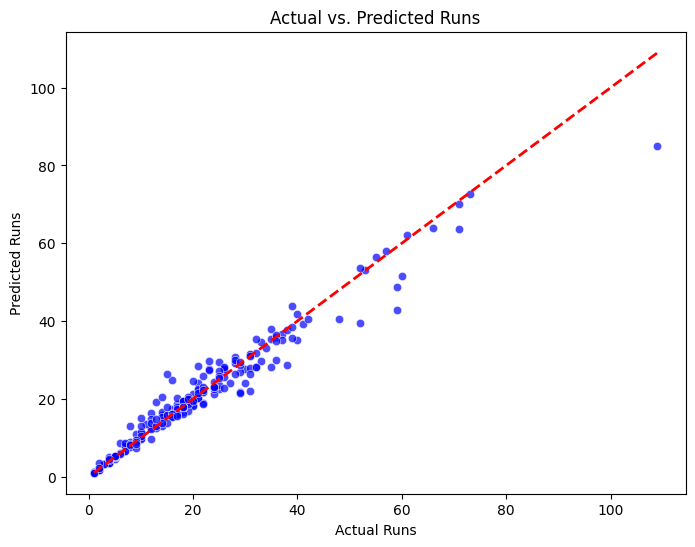

In [22]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, color='blue', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)  # Diagonal line
plt.xlabel("Actual Runs")
plt.ylabel("Predicted Runs")
plt.title("Actual vs. Predicted Runs")
plt.show()


Most of the points align well with the red diagonal line, indicating strong model performance.

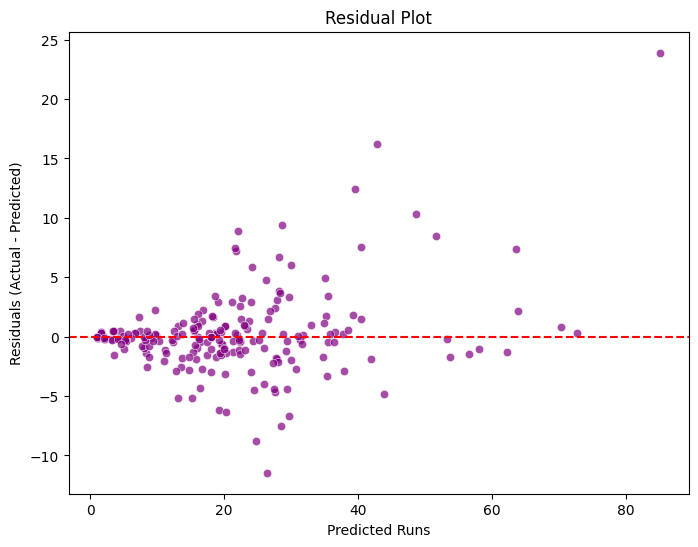

In [23]:
residuals = y_test - y_pred

plt.figure(figsize=(8,6))
sns.scatterplot(x=y_pred, y=residuals, color='purple', alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Runs")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residual Plot")
plt.show()


#### **Observations from the Residual Plot**


Most residuals are close to zero, meaning predictions are generally accurate.
There's no obvious trend, which suggests the model is not severely biased.

###**Predicting the Best Players in Batting, Bowling, and Overall Performance as a Classification Problem**

1. Convert Performance into Classes (Labels)
We'll create three classes:

- Best Players (1): Top 10% performers
- Good Players (2): Next 30% performers
- Average Players(3): Next 30% performers


**Predicting Best Batsman**

In [40]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Aggregate batting performance
batting_stats = cric_data.groupby('batsmanName').agg({
    'runs': 'sum',
    'balls': 'sum',
    '4s': 'sum',
    '6s': 'sum',
    'out/not_out': 'count'  # Total innings played
}).reset_index()

# Calculate Strike Rate, handling potential division by zero
batting_stats['Strike Rate'] = (batting_stats['runs'] / batting_stats['balls']).replace(np.inf, 0) * 100
# Replace infinite values with 0 in 'Strike Rate'

# Rank players based on total runs and strike rate
batting_stats['Rank'] = batting_stats['runs'].rank(ascending=False)

# Define percentile-based classification
batting_stats['batting_class'] = pd.qcut(batting_stats['Rank'], q=[0, 0.1, 0.4, 1], labels=[1, 2, 3])  # 1=Best, 2=Good, 3=Average

# Prepare data for classification
X_bat = batting_stats[['runs', 'Strike Rate', '4s', '6s']]
y_bat = batting_stats['batting_class']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_bat, y_bat, test_size=0.2, random_state=42)

# Train classifier
batting_model = RandomForestClassifier(n_estimators=100, random_state=42)
batting_model.fit(X_train, y_train)

# Predictions
y_pred_bat = batting_model.predict(X_test)

# Evaluation
print("Batting Classification Report:\n", classification_report(y_test, y_pred_bat))
print("Batting Confusion Matrix:\n", confusion_matrix(y_test, y_pred_bat))

Batting Classification Report:
               precision    recall  f1-score   support

           1       0.80      1.00      0.89         4
           2       1.00      0.94      0.97        16
           3       1.00      1.00      1.00        20

    accuracy                           0.97        40
   macro avg       0.93      0.98      0.95        40
weighted avg       0.98      0.97      0.98        40

Batting Confusion Matrix:
 [[ 4  0  0]
 [ 1 15  0]
 [ 0  0 20]]


**Key Observations:**The model performs exceptionally well with high precision, recall, and F1-scores, especially for Classes 2 and 3.
The minor misclassification in Class 2 could be improved, but overall, the model's performance is strong.

Accuracy: 0.97


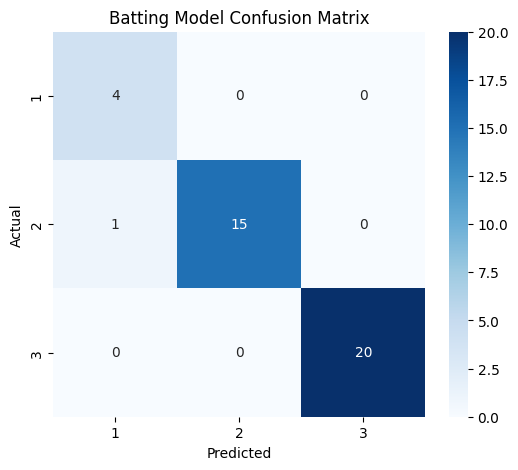

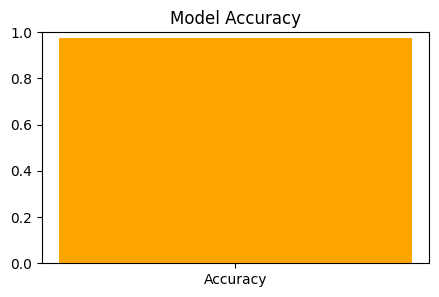

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_bat)
print(f"Accuracy: {accuracy:.2f}")

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred_bat)

# Plot heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[1, 2, 3], yticklabels=[1, 2, 3])
plt.title('Batting Model Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Optionally, plot accuracy
plt.figure(figsize=(5, 3))
plt.bar(["Accuracy"], [accuracy], color='orange')
plt.ylim(0, 1)
plt.title('Model Accuracy')
plt.show()


### **Predict the  best bowler**

In [37]:
# Aggregate bowling performance
bowling_stats = cric_data.groupby('bowlerName').agg({
    'wickets': 'sum',
    'overs': 'sum',
    'maiden': 'sum',
    'economy': 'mean',
    '0s': 'sum'
}).reset_index()

# Rank players based on wickets and economy
bowling_stats['Rank'] = bowling_stats['wickets'].rank(ascending=False)

# Define percentile-based classification
bowling_stats['bowling_class'] = pd.qcut(bowling_stats['Rank'], q=[0, 0.1, 0.4, 1], labels=[1, 2, 3])  # 1=Best, 2=Good, 3=Average

# Prepare data for classification
X_bowl = bowling_stats[['wickets', 'economy', 'maiden', '0s']]
y_bowl = bowling_stats['bowling_class']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_bowl, y_bowl, test_size=0.2, random_state=42)

# Train classifier
bowling_model = RandomForestClassifier(n_estimators=100, random_state=42)
bowling_model.fit(X_train, y_train)

# Predictions
y_pred_bowl = bowling_model.predict(X_test)

# Evaluation
print("Bowling Classification Report:\n", classification_report(y_test, y_pred_bowl))
print("Bowling Confusion Matrix:\n", confusion_matrix(y_test, y_pred_bowl))


Bowling Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00        23

    accuracy                           1.00        27
   macro avg       1.00      1.00      1.00        27
weighted avg       1.00      1.00      1.00        27

Bowling Confusion Matrix:
 [[ 1  0  0]
 [ 0  3  0]
 [ 0  0 23]]


**Summary:**
The bowling model performs flawlessly, achieving 100% accuracy with perfect precision, recall, and F1-scores for each class.
There are no misclassifications, and the model handles all classes (even with different numbers of instances) with equal efficiency

Accuracy: 1.00


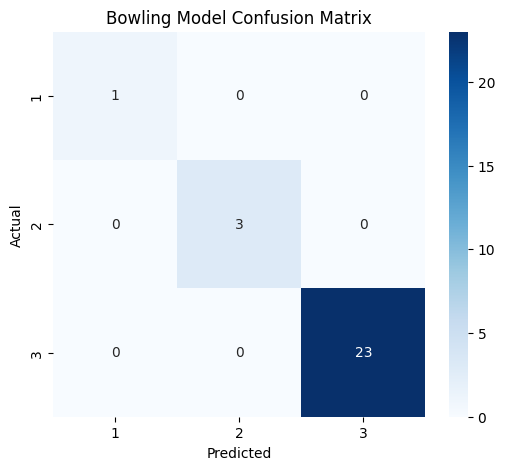

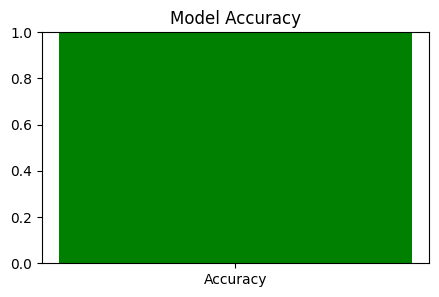

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_bowl)
print(f"Accuracy: {accuracy:.2f}")

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred_bowl)

# Plot heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[1, 2, 3], yticklabels=[1, 2, 3])
plt.title('Bowling Model Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Optionally, you can plot the accuracy as well (a bar plot or other suitable type)
plt.figure(figsize=(5, 3))
plt.bar(["Accuracy"], [accuracy], color='green')
plt.ylim(0, 1)
plt.title('Model Accuracy')
plt.show()
